In [92]:
import numpy as np
from scipy.spatial import Delaunay
import matplotlib.pyplot as plt
import cv2


In [93]:
corner=np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
points = np.random.random((10000, 2))
points=np.concatenate((corner,points))
points*=[255,255]
points=np.array(points,dtype=int)
tri = Delaunay(points)

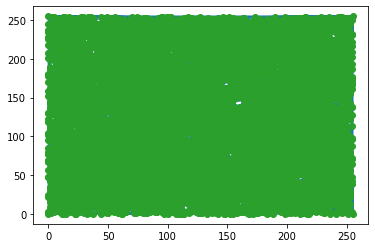

In [94]:
plt.triplot(points[:,0], points[:,1], tri.simplices)
plt.plot(points[:,0], points[:,1], 'o')
plt.show()

In [95]:
img=cv2.imread("../data/Set5/butterfly.png")

In [96]:
points_coord=points[tri.simplices]

In [97]:
class Triangle:
    def __init__(self, coordinate, color) -> None:
        self.coordinate = coordinate
        self.color = color

    def in_triangle(self, p):
        pa = self.coordinate[0]-p
        pb = self.coordinate[1]-p
        pc = self.coordinate[2]-p
        t1 = np.cross(pa, pb)
        t2 = np.cross(pb, pc)
        t3 = np.cross(pc, pa)
        return t1*t2 >= 0 and t1*t3 >= 0


In [98]:
tris=[]
for c in points_coord:
    color = np.array([img[c[0][0]][c[0][1]], img[c[1][0]][c[1][1]], img[c[2][0]][c[2][1]]])
    color = np.mean(color, axis=0)
    tris.append(Triangle(c,color))

In [99]:
from tqdm import tqdm
computed=set()
sample=np.zeros((256,256,3))
for t in tqdm(tris):  # for each triangle
    bbox = np.array([[np.min(t.coordinate[:, 0]), np.min(t.coordinate[:, 1])],
                     [np.max(t.coordinate[:, 0]), np.max(t.coordinate[:, 1])]])
    cv2.imwrite('tri_butterfly.png',sample)
    for x in range(bbox[0][0], bbox[1][0]+1):
        for y in range(bbox[0][1], bbox[1][1]+1):
            if (x,y) in computed:
                continue
            if t.in_triangle(np.array([x,y])):
                computed.add((x,y))
                sample[x][y]=t.color
sample=np.array(sample,dtype=np.uint8)

100%|██████████| 18478/18478 [00:51<00:00, 355.96it/s]


In [100]:
print(sample.shape)
# cv2.imshow('sample',sample)
cv2.imwrite('tri_butterfly.png',sample)
cv2.destroyAllWindows()

(256, 256, 3)
